In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/exchange_rate.csv')

# Display the first few rows of the dataset
print(data.head())



               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [3]:
print(data.last_valid_index)


<bound method NDFrame.last_valid_index of                   date   Ex_rate
0     01-01-1990 00:00  0.785500
1     02-01-1990 00:00  0.781800
2     03-01-1990 00:00  0.786700
3     04-01-1990 00:00  0.786000
4     05-01-1990 00:00  0.784900
...                ...       ...
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825

[7588 rows x 2 columns]>


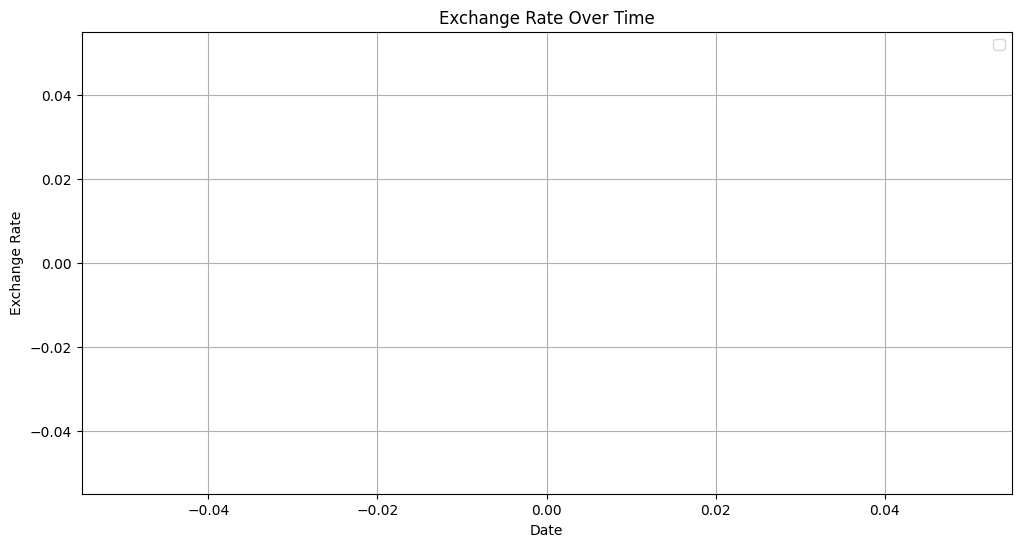

In [9]:
# Plot the exchange rates to understand trends, seasonality, and anomalies
plt.figure(figsize=(12, 6))
plt.plot(label='USD to AUD Exchange Rate', color='blue')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()


In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values


Missing values:
 date       0
Ex_rate    0
dtype: int64


<ipython-input-13-60658166aa8b>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for missing values


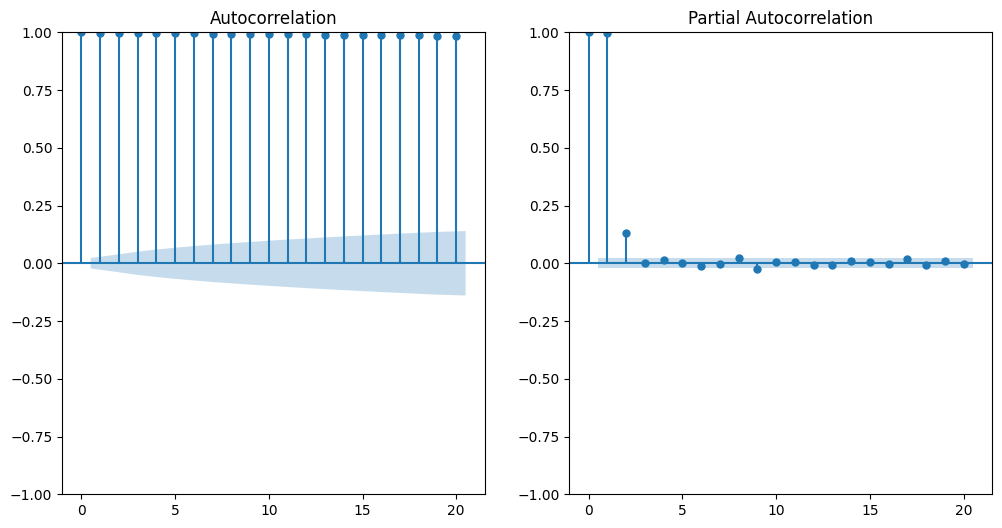

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(data['Ex_rate'], lags=20, ax=plt.subplot(121))
plot_pacf(data['Ex_rate'], lags=20, ax=plt.subplot(122))
plt.show()


In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Define p, d, and q
p = 1
d = 1
q = 1

# Fit ARIMA model (example parameters; p, d, q need to be selected based on ACF and PACF)
model = ARIMA(data['Ex_rate'], order=(p, d, q))  # Replace p, d, q with selected values
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 02 Oct 2024   AIC                         -56102.322
Time:                        06:35:08   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

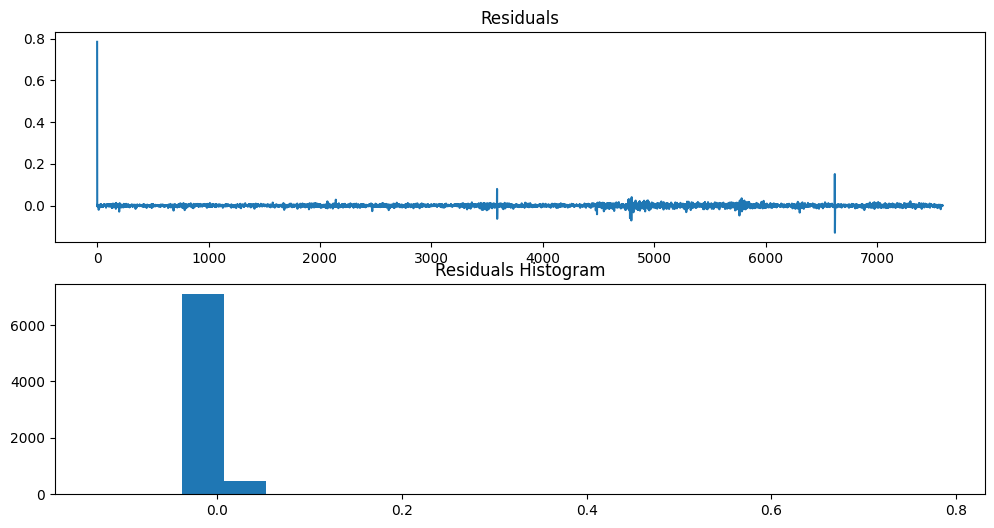

In [31]:
# Residual diagnostics
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()


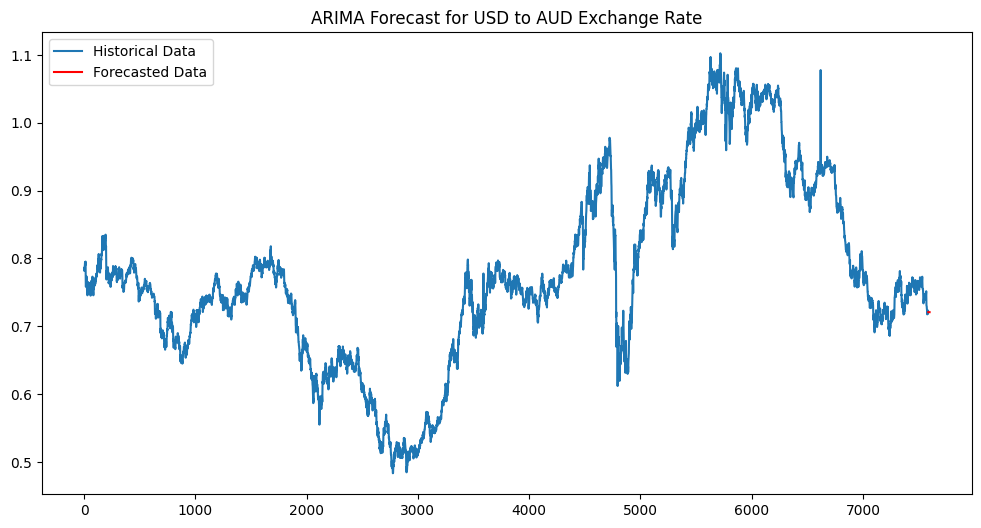

In [33]:
# Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast next 12 periods
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Forecast for USD to AUD Exchange Rate')
plt.legend()
plt.show()


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choose the model type based on the data characteristics (simple, Holt, Holt-Winters)
model_exp = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)  # Adjust as needed


In [35]:
# Fit the model
model_fit_exp = model_exp.fit()
print(model_fit_exp.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Wed, 02 Oct 2024
Box-Cox:                          False   Time:                         06:37:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

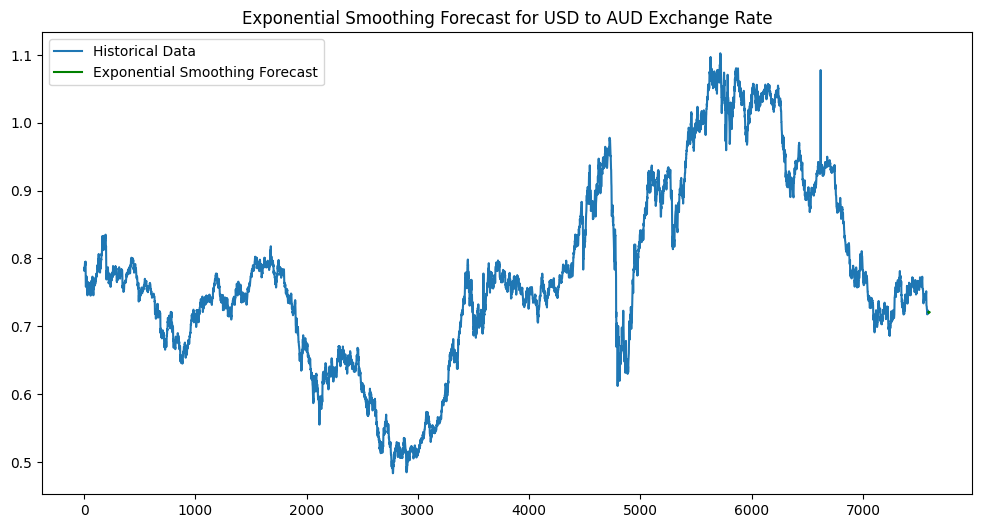

In [36]:
# Forecasting
exp_forecast = model_fit_exp.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast for USD to AUD Exchange Rate')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have a DataFrame named 'data' with the actual values for the forecasted period
# and the dates match the forecasted period
actual_values = data['Ex_rate'][-12:] # Extract the last 12 values from the 'data' DataFrame

# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(actual_values, forecast)  # actual_values should be the actual data for the forecasted period
rmse_arima = mean_squared_error(actual_values, forecast, squared=False)
mape_arima = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
# Compute error metrics for Exponential Smoothing
mae_exp = mean_absolute_error(actual_values, exp_forecast)
rmse_exp = mean_squared_error(actual_values, exp_forecast, squared=False)
mape_exp = np.mean(np.abs((actual_values - exp_forecast) / actual_values)) * 100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# Print the error metrics
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')
print(f'Exponential Smoothing - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}%')

ARIMA - MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan%
Exponential Smoothing - MAE: 0.0015804343412773036, RMSE: 0.0018638340074147194, MAPE: nan%
